In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import tqdm
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

#Import Data and Split

In [ ]:
df = pd.read_csv('./drive/MyDrive/WORKINGF1Data.csv')

In [ ]:
df

,Season,Grand Prix,Driver,Constructor,FP1 Time,FP1 Gap,FP1 Laps,FP2 Time,FP2 Gap,FP2 Laps,FP3 Time,FP3 Gap,FP3 Laps,Grid Position,Qualifying Time
0,2023,bahrain-grand-prix,Pérez,Red Bull,92.758,0.000,21.0,91.078,0.171,26.0,92.446,0.106,12.0,2.0,91.479
1,2023,bahrain-grand-prix,Alonso,Aston Martin,93.196,0.438,22.0,90.907,0.000,25.0,92.340,0.000,13.0,5.0,91.158
2,2023,bahrain-grand-prix,Verstappen,Red Bull,93.375,0.617,21.0,91.076,0.169,24.0,92.345,0.005,13.0,1.0,91.295
3,2023,bahrain-grand-prix,Norris,McLaren,94.165,1.407,21.0,91.570,0.663,27.0,93.202,0.862,16.0,11.0,91.652
4,2023,bahrain-grand-prix,Leclerc,Ferrari,94.257,1.499,17.0,91.367,0.460,26.0,92.624,0.284,21.0,3.0,91.094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6629,2003,japanese-grand-prix,Firman,Jordan,93.306,2.579,18.0,96.368,3.437,13.0,95.620,4.471,15.0,15.0,3.058
6630,2003,japanese-grand-prix,Fisichella,Jordan,93.956,3.229,17.0,96.705,3.774,10.0,95.476,4.327,15.0,16.0,3.199
6631,2003,japanese-grand-prix,Button,BAR,94.445,3.718,9.0,94.171,1.240,18.0,93.411,2.262,22.0,9.0,1.761
6632,2003,japanese-grand-prix,Verstappen,Minardi,95.180,4.453,13.0,96.928,3.997,13.0,97.379,6.230,6.0,17.0,3.262


In [ ]:
test_df= df[df["Season"]>=2021]
train_df =df[df["Season"]<2021].reset_index(drop=True)

In [ ]:
train_df

,Season,Grand Prix,Driver,Constructor,FP1 Time,FP1 Gap,FP1 Laps,FP2 Time,FP2 Gap,FP2 Laps,FP3 Time,FP3 Gap,FP3 Laps,Grid Position,Qualifying Time
0,2020,austrian-grand-prix,Hamilton,Mercedes,64.816,0.000,42.0,64.304,0.000,42.0,64.130,0.000,21.0,2.0,64.198
1,2020,austrian-grand-prix,Bottas,Mercedes,65.172,0.356,38.0,64.501,0.197,37.0,64.277,0.147,22.0,1.0,64.111
2,2020,austrian-grand-prix,Verstappen,Red Bull,65.418,0.602,37.0,65.215,0.911,41.0,64.413,0.283,20.0,3.0,64.024
3,2020,austrian-grand-prix,Sainz,McLaren,65.431,0.615,41.0,65.352,1.048,37.0,65.177,1.047,24.0,8.0,64.537
4,2020,austrian-grand-prix,Pérez,Racing Point,65.512,0.696,33.0,64.945,0.641,48.0,64.605,0.475,19.0,6.0,64.543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5693,2003,japanese-grand-prix,Firman,Jordan,93.306,2.579,18.0,96.368,3.437,13.0,95.620,4.471,15.0,15.0,3.058
5694,2003,japanese-grand-prix,Fisichella,Jordan,93.956,3.229,17.0,96.705,3.774,10.0,95.476,4.327,15.0,16.0,3.199
5695,2003,japanese-grand-prix,Button,BAR,94.445,3.718,9.0,94.171,1.240,18.0,93.411,2.262,22.0,9.0,1.761
5696,2003,japanese-grand-prix,Verstappen,Minardi,95.180,4.453,13.0,96.928,3.997,13.0,97.379,6.230,6.0,17.0,3.262


In [ ]:
test_df

,Season,Grand Prix,Driver,Constructor,FP1 Time,FP1 Gap,FP1 Laps,FP2 Time,FP2 Gap,FP2 Laps,FP3 Time,FP3 Gap,FP3 Laps,Grid Position,Qualifying Time
0,2023,bahrain-grand-prix,Pérez,Red Bull,92.758,0.000,21.0,91.078,0.171,26.0,92.446,0.106,12.0,2.0,91.479
1,2023,bahrain-grand-prix,Alonso,Aston Martin,93.196,0.438,22.0,90.907,0.000,25.0,92.340,0.000,13.0,5.0,91.158
2,2023,bahrain-grand-prix,Verstappen,Red Bull,93.375,0.617,21.0,91.076,0.169,24.0,92.345,0.005,13.0,1.0,91.295
3,2023,bahrain-grand-prix,Norris,McLaren,94.165,1.407,21.0,91.570,0.663,27.0,93.202,0.862,16.0,11.0,91.652
4,2023,bahrain-grand-prix,Leclerc,Ferrari,94.257,1.499,17.0,91.367,0.460,26.0,92.624,0.284,21.0,3.0,91.094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2021,abu-dhabi-grand-prix,Stroll,Aston Martin,86.608,1.599,26.0,85.385,1.694,26.0,84.821,1.547,22.0,13.0,84.061
932,2021,abu-dhabi-grand-prix,Ricciardo,McLaren,86.676,1.667,29.0,84.959,1.268,26.0,84.733,1.459,16.0,10.0,83.829
933,2021,abu-dhabi-grand-prix,Latifi,Williams,87.487,2.478,27.0,85.687,1.996,22.0,85.322,2.048,19.0,16.0,84.338
934,2021,abu-dhabi-grand-prix,Schumacher,Haas,87.698,2.689,24.0,85.784,2.093,27.0,85.340,2.066,18.0,19.0,84.906


##EDA

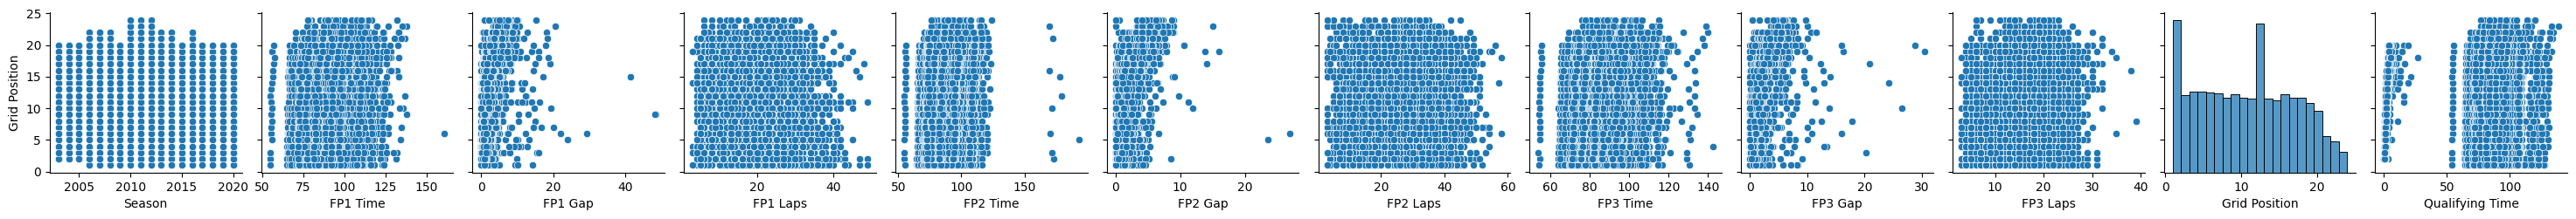

In [ ]:
sns.pairplot(train_df, y_vars="Grid Position")

In [ ]:
train_df.columns

Index(['Season', 'Grand Prix', 'Driver', 'Constructor', 'FP1 Time', 'FP1 Gap',
       'FP1 Laps', 'FP2 Time', 'FP2 Gap', 'FP2 Laps', 'FP3 Time', 'FP3 Gap',
       'FP3 Laps', 'Grid Position', 'Qualifying Time'],
      dtype='object')

In [ ]:
train_df[[ 'FP1 Time', 'FP1 Gap',
       'FP1 Laps', 'FP2 Time', 'FP2 Gap', 'FP2 Laps', 'FP3 Time', 'FP3 Gap',
       'FP3 Laps', 'Grid Position']].corr()

,FP1 Time,FP1 Gap,FP1 Laps,FP2 Time,FP2 Gap,FP2 Laps,FP3 Time,FP3 Gap,FP3 Laps,Grid Position
FP1 Time,1.000000,0.309840,-0.301073,0.948746,0.224204,-0.244806,0.914894,0.175097,-0.132754,0.097205
FP1 Gap,0.309840,1.000000,-0.271756,0.181628,0.519921,-0.159357,0.204232,0.439272,-0.023398,0.450429
FP1 Laps,-0.301073,-0.271756,1.000000,-0.240662,-0.131557,0.409663,-0.231910,-0.080524,0.352745,-0.012424
FP2 Time,0.948746,0.181628,-0.240662,1.000000,0.262420,-0.304290,0.897465,0.152570,-0.116265,0.089465
FP2 Gap,0.224204,0.519921,-0.131557,0.262420,1.000000,-0.273548,0.199649,0.580879,0.035685,0.614063
FP2 Laps,-0.244806,-0.159357,0.409663,-0.304290,-0.273548,1.000000,-0.194430,-0.107337,0.168077,-0.050816
FP3 Time,0.914894,0.204232,-0.231910,0.897465,0.199649,-0.194430,1.000000,0.285620,-0.265772,0.093230
FP3 Gap,0.175097,0.439272,-0.080524,0.152570,0.580879,-0.107337,0.285620,1.000000,-0.150171,0.535976
FP3 Laps,-0.132754,-0.023398,0.352745,-0.116265,0.035685,0.168077,-0.265772,-0.150171,1.000000,0.104665
Grid Position,0.097205,0.450429,-0.012424,0.089465,0.614063,-0.050816,0.093230,0.535976,0.104665,1.000000


Gap looks highly correlated with grid position, lower gap to first, the lower the grid position

##Get Dummies for constructors

In [ ]:
pd.get_dummies(train_df["Constructor"])

,Alfa Romeo,AlphaTauri,BAR,BMW Sauber,Brawn,Caterham,Ferrari,Force India,HRT,Haas,...,Racing Point,Red Bull,Renault,Sauber,Spyker,Super Aguri,Toro Rosso,Toyota,Virgin,Williams
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5845,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5846,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5847,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#NN

##Convert to Tensors

In [ ]:
train_df.columns

Index(['Season', 'Grand Prix', 'Driver', 'Constructor', 'FP1 Time', 'FP1 Gap',
       'FP1 Laps', 'FP2 Time', 'FP2 Gap', 'FP2 Laps', 'FP3 Time', 'FP3 Gap',
       'FP3 Laps', 'Grid Position', 'Qualifying Time'],
      dtype='object')

In [ ]:
sum=0
for i in range(len(train_df)):
  if train_df["Grid Position"][i]>20:
    sum =sum+1

sum

314

There are more than 20 racers in some races, there are some with up to 24 it seems. Drop those since there are a max of 20 in the test set for all races.


In [ ]:
bad=[]
for i in range(len(train_df)):
  if train_df["Grid Position"][i]>20:
    bad.append(i)

train_df2 = train_df.drop(bad)

In [ ]:
trainX_df = train_df2[['FP1 Time', 'FP1 Gap','FP1 Laps', 'FP2 Time', 'FP2 Gap', 'FP2 Laps', 'FP3 Time', 'FP3 Gap','FP3 Laps']]

trainY_df = pd.get_dummies(train_df2["Grid Position"], dtype=float)

train_X =torch.Tensor(np.copy(trainX_df))
train_Y = torch.Tensor(np.copy(trainY_df))

In [ ]:
testX_df = test_df[['FP1 Time', 'FP1 Gap','FP1 Laps', 'FP2 Time', 'FP2 Gap', 'FP2 Laps', 'FP3 Time', 'FP3 Gap','FP3 Laps']]

testY_df = pd.get_dummies(test_df["Grid Position"], dtype=float)

test_X =torch.Tensor(np.copy(testX_df))
test_Y = torch.Tensor(np.copy(testY_df))

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self, x, y, batch_size=64):
    #data
    self.x=x
    self.y=y

    #aux var
    self.N=len(x) #num of samples in data
    self.batch_size=batch_size

  def __len__(self): #returns num of samples in dataset
    return self.N

  def __getitem__(self, index):
    x = self.x[index]
    y= self.y[index]

    return x, y

In [ ]:
batch_size=64 #minibatch from literature
dataset = CustomDataset(train_X, train_Y, batch_size)
dataloader = DataLoader(dataset, batch_size, shuffle=True) #the deepONet in deepxde shuffles the data between epochs

In [ ]:
num_cat = len(train_Y[0]) #we have 20 categories
num_in = len(train_X[0]) #3x3 inputs, so 9

##Model

In [ ]:
class Dense(nn.Module):
  def __init__(self , numhiddens):
    super(Dense, self).__init__()

    self.Layers =nn.ModuleList([nn.Linear(numhiddens[0], numhiddens[1])])
    for i in range(1, len(numhiddens)-1):
      self.Layers.append(nn.Linear(numhiddens[i], numhiddens[i+1]))

    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    out = self.Layers[0](x)
    for i in range(1, len(self.Layers)):
      out = self.relu(out)
      out = self.Layers[i](out)

    return self.softmax(out)

In [ ]:
model = Dense([num_in, 64, 64, 64, num_cat]) #we have 3x3 input, and 20 grid positions
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

##Training

In [ ]:
def accuracyNPositions(pred, target, n):
  sum=0
  pos = np.argmax(pred, axis=1)
  tar = np.argmax(target, axis=1)
  for i in range(len(pos)):
    if abs(pos[i] - tar[i])<n:
      sum=sum+1

  return sum/len(pred)*100

In [ ]:
pred_train = model.forward(train_X).detach().numpy()
accuracyNPositions(pred_train, train_Y, 2)

15.936106983655273

In [ ]:
epochs = 1000
loss_hist =[]
test_acc=[]
train_acc=[]
test_acc2=[]
train_acc2=[]

for i in tqdm.tqdm(range(epochs)):
  model.train()
  for batch, (x, y) in enumerate(dataloader):
    optimizer.zero_grad()

    pred=model.forward(x)
    loss = loss_fn(pred, y) #format is (input, target)

    loss.backward()
    optimizer.step()

  loss_hist.append(loss.item())

  if i % 100 ==0:
    print("Loss: ", loss.item())

    pred_train = model.forward(train_X).detach().numpy()
    train_acc.append(100 - np.sum(abs(train_Y.detach().numpy()- pred_train))/(2*len(train_Y))*100)
    print("train accuracy: ", train_acc[-1], "%")
    train_acc2.append(accuracyNPositions(pred_train, train_Y, 2))
    print("test accuracy w/in 2: ",train_acc2[-1] , "%")

    preds = model(test_X).detach().numpy()
    test_acc.append(100 - np.sum(abs(test_Y.detach().numpy()- preds))/(2*len(test_Y))*100)
    print("test accuracy: ",test_acc[-1] , "%")
    test_acc2.append(accuracyNPositions(preds, test_Y, 2))
    print("test accuracy w/in 2: ",test_acc2[-1] , "%")

  0%|          | 1/1000 [00:00<05:50,  2.85it/s]

Loss:  2.997133731842041
train accuracy:  5.187534825408619 %
test accuracy w/in 2:  15.286032689450224 %
test accuracy:  5.088786589793671 %
test accuracy w/in 2:  15.705128205128204 %


 10%|█         | 101/1000 [00:26<04:21,  3.43it/s]

Loss:  2.910802125930786
train accuracy:  15.007901014580241 %
test accuracy w/in 2:  36.73848439821694 %
test accuracy:  10.097875350560898 %
test accuracy w/in 2:  31.41025641025641 %


 20%|██        | 201/1000 [00:52<03:30,  3.80it/s]

Loss:  2.9187960624694824
train accuracy:  17.376708984375 %
test accuracy w/in 2:  38.763001485884104 %
test accuracy:  11.141517834785645 %
test accuracy w/in 2:  34.401709401709404 %


 30%|███       | 301/1000 [01:19<03:27,  3.38it/s]

Loss:  2.825838327407837
train accuracy:  20.615009460902684 %
test accuracy w/in 2:  40.768945022288264 %
test accuracy:  10.485409467648239 %
test accuracy w/in 2:  33.97435897435898 %


 40%|████      | 401/1000 [01:47<03:03,  3.26it/s]

Loss:  2.9102225303649902
train accuracy:  17.77045376056371 %
test accuracy w/in 2:  36.45988112927191 %
test accuracy:  9.744386591463012 %
test accuracy w/in 2:  32.371794871794876 %


 50%|█████     | 500/1000 [02:13<02:42,  3.07it/s]

Loss:  2.8142893314361572
train accuracy:  24.26158343877694 %


 50%|█████     | 501/1000 [02:14<03:31,  2.36it/s]

test accuracy w/in 2:  42.477711738484395 %
test accuracy:  10.00345996302417 %
test accuracy w/in 2:  33.01282051282051 %


 60%|██████    | 600/1000 [02:44<02:06,  3.15it/s]

Loss:  2.803065776824951
train accuracy:  25.287568090929142 %
test accuracy w/in 2:  43.164933135215456 

 60%|██████    | 601/1000 [02:45<02:27,  2.70it/s]

%
test accuracy:  10.559825408153046 %
test accuracy w/in 2:  33.76068376068376 %


 70%|███████   | 701/1000 [03:17<01:40,  2.97it/s]

Loss:  2.8465967178344727
train accuracy:  22.716958668044214 %
test accuracy w/in 2:  41.62332838038633 %
test accuracy:  9.394706008780716 %
test accuracy w/in 2:  32.371794871794876 %


 80%|████████  | 801/1000 [03:44<00:58,  3.40it/s]

Loss:  2.823211669921875
train accuracy:  23.656900074294214 %
test accuracy w/in 2:  42.73774145616642 %
test accuracy:  9.871530125283783 %
test accuracy w/in 2:  32.69230769230769 %


 90%|█████████ | 901/1000 [04:12<00:32,  3.09it/s]

Loss:  2.828230381011963
train accuracy:  27.06336464959834 %
test accuracy w/in 2:  44.00074294205052 %
test accuracy:  10.440559061164535 %
test accuracy w/in 2:  33.76068376068376 %


100%|██████████| 1000/1000 [04:47<00:00,  3.48it/s]


Text(0.5, 1.0, 'Formula 1 Categorical Starting Grid Prediction Loss')

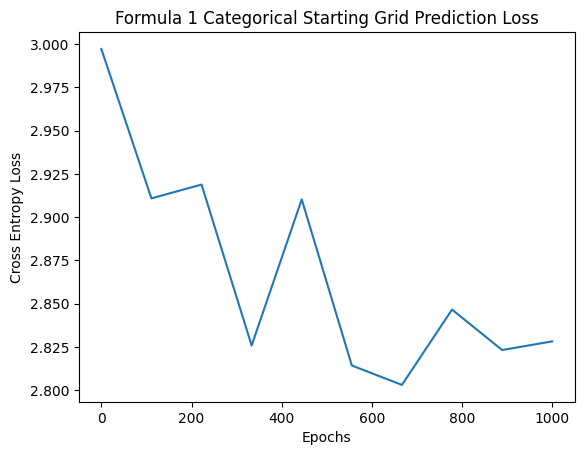

In [ ]:
plt.plot(np.linspace(0, epochs,10), loss_hist[::100])
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epochs")
plt.title("Formula 1 Categorical Starting Grid Prediction Loss")

Text(0.5, 1.0, 'Formula 1 Categorical Starting Grid Prediction Accuracy')

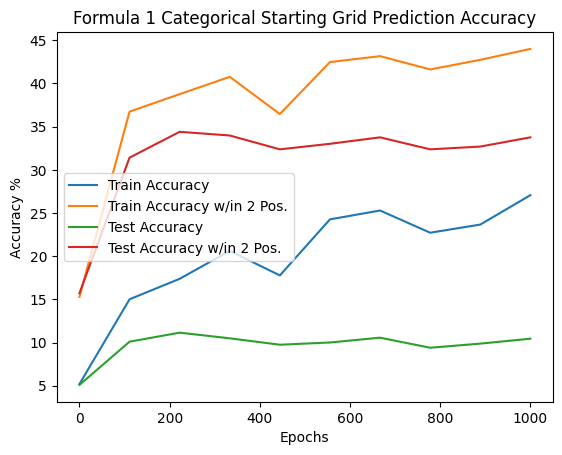

In [ ]:
plt.plot(np.linspace(0, epochs,10), train_acc)
plt.plot(np.linspace(0, epochs,10), train_acc2)
plt.plot(np.linspace(0, epochs,10), test_acc)
plt.plot(np.linspace(0, epochs,10), test_acc2)
plt.ylabel("Accuracy %")
plt.xlabel("Epochs")
plt.legend(["Train Accuracy", "Train Accuracy w/in 2 Pos.", "Test Accuracy", "Test Accuracy w/in 2 Pos."])
plt.title("Formula 1 Categorical Starting Grid Prediction Accuracy")